# Acceptor & Donor Frequency Plots

Analysis notebook for producing figures.
- Produces bar chart of top 10 species for terminal acceptor, core donor, and core acceptor

## User Input

In [1]:
# path to analysis file
path = 'full_analysis_data.csv'

## Imports

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.constants as sc

## Methods

In [3]:
# helper function for top_ten
# takes any dataframe with col: filename
# returns new dataframe with additional cols: acc_term, don_core, acc_core

def split_filename(df):
    df2 = df.copy()

    new = df2['filename'].str.split('_', expand=True)
    df2['acc_term'] = new[0]
    if df2['acc_term'] == 45:
        
    df2['don_core'] = new[1]
    df2['acc_core'] = new[2]
    
    return df2

In [4]:
# takes any dataframe with cols: acc_term, don_core, acc_core
# returns list of 3 new dataframes with cols: [acc_term, acc_term_count, acc_term_perc], [don_core, don_core_count, don_core_perc], and [acc_core, acc_core_count, acc_core_perc]

def get_freq_counts(df):

    # split filename column
    df_split = split_filename(df)

    # make series objects of each part of filename with accompanying counts
    # note that both monomer columns are combined before creating series with value counts
    count_at = df_split['acc_term'].value_counts()
    count_dc = df_split['don_core'].value_counts()
    count_ac = df_split['acc_core'].value_counts()
    
    # make series objects into dataframes and rename columns appropriately
    count_at = pd.DataFrame(count_at.reset_index())
    count_at.columns = ['acc_term', 'acc_term_count']
    
    count_dc = pd.DataFrame(count_dc.reset_index())
    count_dc.columns = ['don_core', 'don_core_count']

    count_ac = pd.DataFrame(count_ac.reset_index())
    count_ac.columns = ['acc_core', 'acc_core_count']
      
    # make percentage column in each dataframe  
    count_at['acc_term_perc'] = count_at['acc_term_count']/count_at['acc_term_count'].sum()*100
    count_dc['don_core_perc'] = count_dc['don_core_count']/count_dc['don_core_count'].sum()*100
    count_ac['acc_core_perc'] = count_ac['acc_core_count']/count_ac['acc_core_count'].sum()*100
    
    return [count_at, count_dc, count_ac]  

## Data Processing

Make DF of run data  
NOTE: Within generations, species are listed from best ranked to worst ranked

In [5]:
run_data = pd.read_csv(path, index_col=False)

In [6]:
run_data.tail()

,gen,filename,deltaHOMO,summedoscs,PCE,donor
3213,99,48_48_0_48_48,0.91,7.007241,16.684218,PBDB-T-SF
3214,99,75_48_5_48_75,0.91,7.004831,16.680899,PBDB-T-SF
3215,99,30_48_5_48_30,0.77,7.331942,16.535630,PBDB-T-SF
3216,99,69_48_17_48_69,0.07,9.186997,16.111541,PBDB-T-SF
3217,99,45_47_5_47_45,0.98,0.000000,7.333097,PBDB-T-SF


In [7]:
at_counts, dc_counts, ac_counts = get_freq_counts(run_data)

# take top 10 only
at_counts = at_counts[:10]
dc_counts = dc_counts[:10]
ac_counts = ac_counts[:10]

In [8]:
at_counts

,acc_term,acc_term_count,acc_term_perc
0,78,725,22.529521
1,90,563,17.495339
2,69,284,8.825357
3,45,270,8.390305
4,88,219,6.805469
5,52,205,6.370416
6,0,183,5.686762
7,18,149,4.630205
8,20,72,2.237415
9,99,27,0.839030


## Generate Plots

Set global font sizes for plotting

In [9]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

### Monomer Plot

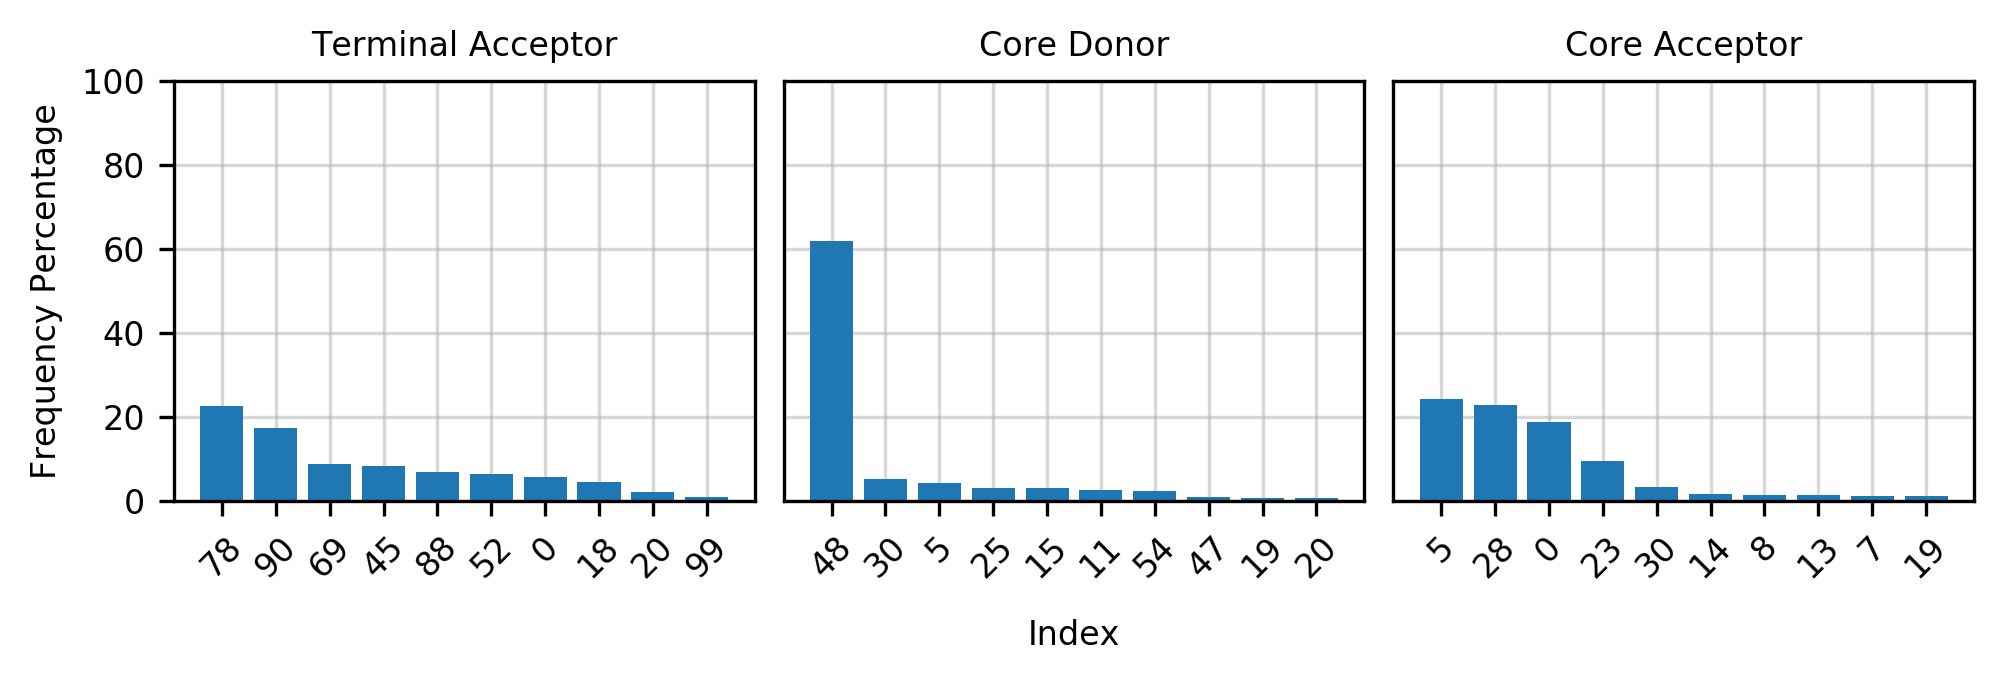

In [10]:
fig, axs = plt.subplots(1, 3, sharey=True, dpi=300)

rot=45
wt='bold'

plt.rcParams["font.weight"] = 'regular'

axs[0].bar('acc_term', 'acc_term_perc', data=at_counts)
axs[0].set_title('Terminal Acceptor')
axs[0].set_xticklabels(at_counts['acc_term'], rotation=rot)
axs[0].set(ylim=(0, 100))

axs[0].grid(alpha=0.5)
axs[0].set_axisbelow(True)

axs[1].bar('don_core', 'don_core_perc', data=dc_counts)
axs[1].set_title('Core Donor')
axs[1].set_xticklabels(dc_counts['don_core'], rotation=rot)

axs[1].grid(alpha=0.5)
axs[1].set_axisbelow(True)

for tic in axs[1].yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False

axs[2].bar('acc_core', 'acc_core_perc', data=ac_counts)
axs[2].set_title('Core Acceptor')
axs[2].set_xticklabels(ac_counts['acc_core'], rotation=rot)

axs[2].grid(alpha=0.5)
axs[2].set_axisbelow(True)

for tic in axs[2].yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False

top = 0.5
bottom = 0.15
left = 0
right = 1

fig.text((left+right)/2, 0.03,'Index', ha='center')
fig.text(-0.08, (top+bottom)/2,'Frequency Percentage', va='center', rotation='vertical')

plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.55, wspace=0.05)

plt.savefig('frequency_plot.pdf', transparent=False, bbox_inches='tight')
plt.savefig('frequency_plot.png', transparent=False, bbox_inches='tight')

plt.show()
